# <font color=dodgerblue>Parte 2</font>

In [4]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [5]:
dataset = pandas.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
dataset.shape

(1620, 120)

In [6]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

In [7]:
dataset = dataset[important_cols].replace('-', numpy.nan)
for score_col in score_cols:
  dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0


## <font color=dodgerblue>3.</font>

### <font color=dodgerblue>3.2</font>

## Distribuciones

Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

In [17]:
from scipy import stats
from datasets import dataset
from utils import display_markdown, summarize_iterable

def standard_score_dataset(data):
    """
    """
    mean = data.mean()
    std = data.std()
    z_score = (data - mean)/ std
    return z_score

In [18]:
pfi_global = dataset.pf_identity.dropna()
hfs_global = dataset.hf_score.dropna()

hfs_global_scale = standard_score_dataset(hfs_global)
pfi_global_scale = standard_score_dataset(pfi_global)
normal_standard = numpy.random.normal(size=hfs_global_scale.size)

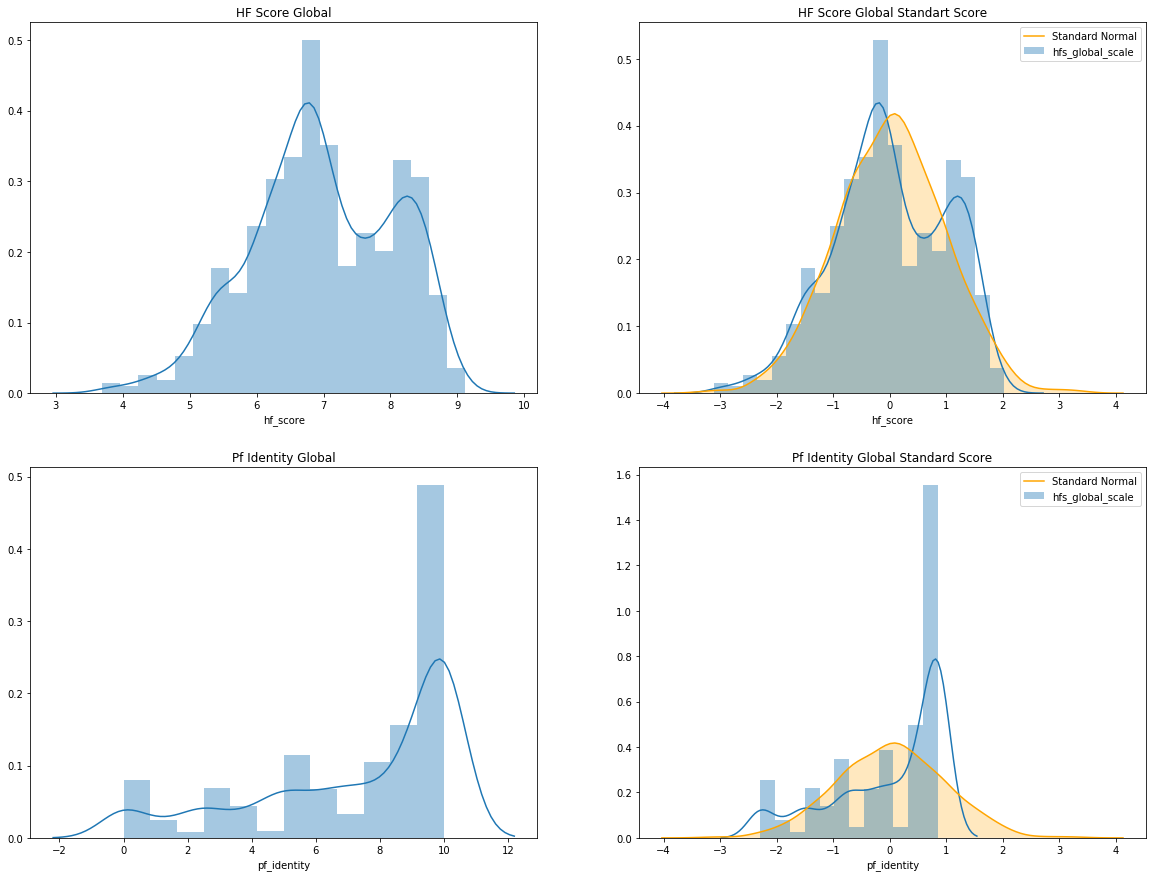

In [19]:

figure, axes = plt.subplots(2,2, figsize=(20,15))

axes[0,0].set_title('HF Score Global')
seaborn.distplot(hfs_global, label = 'hfs_global', ax=axes[0,0])

axes[0,1].set_title('HF Score Global Standart Score')
seaborn.distplot(hfs_global_scale, label = 'hfs_global_scale', ax=axes[0,1])
seaborn.distplot(normal_standard, label = 'Standard Normal', color='orange',  kde_kws={"shade": True}, hist=False, ax=axes[0,1])

axes[1,0].set_title('Pf Identity Global')
seaborn.distplot(pfi_global, label = 'hfs_global', ax=axes[1,0])
axes[1,1].set_title('Pf Identity Global Standard Score')
seaborn.distplot(pfi_global_scale, label = 'hfs_global_scale', ax=axes[1,1])
seaborn.distplot(normal_standard, label = 'Standard Normal', color='orange', kde_kws={"shade": True}, hist=False, ax=axes[1,1])
plt.legend()
plt.show()

In [20]:

display_markdown('## Respuesta')
R_Identity = stats.kstest(pfi_global_scale, 'norm')
print ('El Estadistico KS para \"pf_identity\"" es: ', R_Identity[0])
print ('El p-valor para \"pf_identity\"" es: ', R_Identity[1])
print()



R_HF = stats.kstest(hfs_global_scale, 'norm')
print ('El Estadistico KS para \"hf_score\"" es: ', R_HF[0])
print ('El p-valor para \"hf_score\"" es: ', R_HF[1])
print()

if (R_Identity[1]<0.05):
    print('\"pf_Identity\"" tiene distribucion NO NORMAL') 
else:
    print('\" pf_Identity\"" tiene distribucion NORMAL')

if (R_HF[1] < 0.05): 
    print('\"hf_score\"" tiene distribucion NO NORMAL')
else: 
    print('\" hf_score\"" tiene distribucion NORMAL')


    

## Respuesta

El Estadistico KS para "pf_identity"" es:  0.22117579326428533
El p-valor para "pf_identity"" es:  1.2026957468454308e-66

El Estadistico KS para "hf_score"" es:  0.06489869947594595
El p-valor para "hf_score"" es:  4.404265240435491e-06

"pf_Identity"" tiene distribucion NO NORMAL
"hf_score"" tiene distribucion NO NORMAL


## <font color=dodgerblue>4.</font>

### <font color=dodgerblue>4.3</font>

### OBS
Ambas variables son ordinal discretas y presentan distribucion NO NORMAL
por lo tanto no podemos aplicar Pearson pero si podriamos aplicar Spearman y Kendall.
La existencia de correlacion NO IMPLICA causalidad

In [12]:
from scipy import stats

#creo el DataFrame a partir de los array de las Variables

C = [PF_Identity,HF_Score]
df_I_HF = pandas.DataFrame(C)
df_I_HF.index = ['PF_Identity','HF_Score']


roS, p_valueS = stats.spearmanr(PF_Identity,HF_Score)

tauK, p_valueK = stats.kendalltau(PF_Identity,HF_Score)

print('Spearman roS =' , roS,', p-value =', p_valueS)
print()
print('Kendall tauK =', tauK, ', p-value =', p_valueK)

Spearman roS = 0.6493338224069182 , p-value = 4.258111613666192e-185

Kendall tauK = 0.48642163603701766 , p-value = 3.510054300364989e-155


Los dos test arrojan valores semejantes.
* Los valores positivos cercanos a 0.5 para ambos estadisticos indican que habria una moderada asociacion positiva de ambas variables.
* Los p-valores de ambos test son practicamente cero por lo tanto menor al valor de significancia (alfa del 5%) por lo que se rechaza
  la Hipotesis Nula (No existe asociacion entre las variables). Por lo tanto existe asociacion entre ellas.

## CONCLUSION: Exite relacion moderada positiva entre las variables pf_Identity y hf_Score

Además de completar estos puntos faltantes, luego de haber visitado los conceptos de percepción visual y comunicación efectiva, están en condiciones de reveer los gráficos realizados y evaluar si pueden ser mejorados. Para ello, puede hacerse las siguientes preguntas:

* ¿Están utilizando el tipo de gráfico adecuado para cada tipo de variable?
* Los gráficos, ¿son legibles?
* Los gráficos generados, ¿responden a las preguntas mostrando un patrón claro? En caso de que no, ¿podemos filtrar los datos para que el patrón sea más evidente? ¿o agruparlos de manera distinta? ¿o cambiar el tipo de gráfico?